### Understanding the data

There are 2947 test instances with 561 features. While training instances were not mentioned explicitly in the paper, it is stated that 70% of the whole data collection is dedicated for training. In addition to the standard features used in the previous experiment, new features  (energy of different frequency bands, frequency skew- ness, and angle between vectors are added to the list of features) are added to improve learning performance.

### Libraries and modules

In [15]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

### Data

In [249]:
# import data
X_train = (pd.read_csv('train/X_train.txt', header=None, delimiter=r"\s+")).values
y_train = (pd.read_csv('train/y_train.txt', header=None, delimiter=r"\s+")).values
y_train = y_train.ravel()

X_test = (pd.read_csv('test/X_test.txt', header=None, delimiter=r"\s+")).values
y_test = (pd.read_csv('test/y_test.txt', header=None, delimiter=r"\s+")).values
y_test = y_test.ravel()

print "Size of training data:"
print X_train.shape
print y_train.shape
print "No of unique labels: {}".format(np.unique(y_train))
print 
print "Size of test data:"
print X_test.shape
print y_test.shape

# for report
classifier_r = []
parameters_r = []
f1score_r = []
accuracy_r = []


Size of training data:
(7352, 561)
(7352,)
No of unique labels: [1 2 3 4 5 6]

Size of test data:
(2947, 561)
(2947,)


### K-Nearest Neighbour
Choosing the best K value for the model

In [253]:
# build model
def plot_estimator(estimator, X, y):
    '''
    This function takes a model (estimator), 
    '''
    estimator.fit(X, y)
    # Determine the maximum and minimum mesh as a boundary
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    # Generating the points on the mesh
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Make predictions on the grid points
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # for color
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Original training sample
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

start_time = time.time()
print("Running ...")
print 
k_val = []
f_score = []
acc = []
print "\tK\t\tF1-score\tAccuracy"

# Build a kNN using 1-50 neighbour nodes
for i in range(1,51):
    k_val.append(i)
    knn_model = KNeighborsClassifier(n_neighbors=i)
    y_pred = cross_val_predict(knn_model, X_train, y_train, cv=10)
    knn_f1score = f1_score(y_train, y_pred, average='weighted')
    knn_accuracy = accuracy_score(y_train, y_pred)
    f_score.append(knn_f1score)
    acc.append(knn_accuracy)
    print "\t{:f}\t{:f}\t{:f}".format(i,knn_f1score, knn_accuracy)

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))


Running ...

	K		F1-score	Accuracy
	1.000000	0.891965	0.892138
	2.000000	0.880233	0.880441
	3.000000	0.903255	0.903564
	4.000000	0.901445	0.901523
	5.000000	0.907040	0.907372
	6.000000	0.905896	0.906012
	7.000000	0.907273	0.907644
	8.000000	0.909544	0.909684
	9.000000	0.905987	0.906420
	10.000000	0.910050	0.910229
	11.000000	0.907802	0.908188
	12.000000	0.908563	0.908732
	13.000000	0.906702	0.907100
	14.000000	0.908943	0.909140
	15.000000	0.908059	0.908460
	16.000000	0.906477	0.906692
	17.000000	0.906831	0.907236
	18.000000	0.907114	0.907372
	19.000000	0.907070	0.907508
	20.000000	0.908288	0.908596
	21.000000	0.906651	0.907100
	22.000000	0.905316	0.905604
	23.000000	0.905801	0.906284
	24.000000	0.904855	0.905196
	25.000000	0.905244	0.905740
	26.000000	0.904668	0.905060
	27.000000	0.904692	0.905196
	28.000000	0.903442	0.903836
	29.000000	0.902044	0.902612
	30.000000	0.902727	0.903156
	31.000000	0.903160	0.903700
	32.000000	0.903277	0.903700
	33.000000	0.903162	0.903700
	34.000000	0.9028

In [254]:
# best K
print "The highest f1 score is {}". format(max(f_score))
idx = f_score.index(max(f_score))
best_K = k_val[idx]
print "The best K is {}".format(best_K)

The highest f1 score is 0.910049702244
The best K is 10


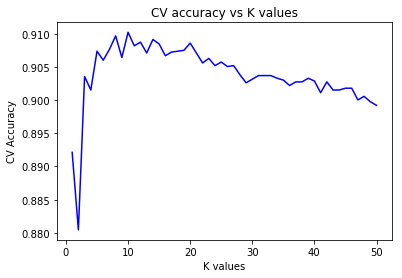

In [255]:
plt.plot(range(1,51), acc, color='b')
plt.xlabel('K values')    
plt.ylabel('CV Accuracy')
plt.title('CV accuracy vs K values')
plt.show()

We evaluate the model using the test set

In [256]:
# test performance
start_time = time.time()
print("Running ...")
print 
print "\tK\t\tF1-score\tAccuracy"

knn_model = KNeighborsClassifier(n_neighbors=best_K)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
test_f1score = f1_score(y_test, y_pred, average='weighted')
print "\t{:f}\t{:f}\t{:f}".format(best_K, test_f1score, test_acc)
print 
print "Confusion matrix"
print confusion_matrix(y_test, y_pred)

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("K-NN")
parameters_r.append("No. of neighbours = {}".format(best_K))
f1score_r.append(test_f1score)
accuracy_r.append(test_acc)

Running ...

	K		F1-score	Accuracy
	10.000000	0.905978	0.906685

Confusion matrix
[[486   0  10   0   0   0]
 [ 36 431   4   0   0   0]
 [ 51  41 328   0   0   0]
 [  0   4   0 409  78   0]
 [  0   0   0  47 485   0]
 [  0   0   0   2   2 533]]
--- Running time: 14.2964010239 seconds ---


### Multiclass Logistic Regression with Elastic Net
First we determine the best alpha and l1 values for the model.

In [258]:
alpha_val = [1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]
l1 = [0,0.15,0.5,0.7,1]

alpha_ = []
l1_ = []
fscore = []
accur = []
print("Running ...")
print 

print "\tAlpha\t\tL1 Ratio\tF1-score\tAccuracy"

for i in range(0,6):
    for j in l1:
        enet = SGDClassifier(loss='log', penalty='elasticnet', alpha=alpha_val[i], l1_ratio=j) 
        enet.fit(X_train, y_train)
        y_pred = enet.predict(X_train)
        enet_acc = accuracy_score(y_pred, y_train)
        y_pred = cross_val_predict(enet, X_train, y_train, cv=10)
        en_f1score = f1_score(y_train, y_pred, average='weighted')
        en_accuracy = accuracy_score(y_train, y_pred)
        alpha_.append(alpha_val[i])
        l1_.append(j)
        fscore.append(en_f1score)
        accur.append(accuracy)
        print "\t{:f}\t{:f}\t{:f}\t{:f}".format(alpha_val[i],j,en_f1score, en_accuracy)

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))


Running ...

	Alpha		L1 Ratio	F1-score	Accuracy
	0.000100	0.000000	0.911455	0.911589
	0.000100	0.150000	0.925097	0.925326
	0.000100	0.500000	0.932776	0.932807
	0.000100	0.700000	0.932035	0.931991
	0.000100	1.000000	0.925149	0.925054
	0.000300	0.000000	0.910651	0.910501
	0.000300	0.150000	0.914220	0.913765
	0.000300	0.500000	0.932043	0.932127
	0.000300	0.700000	0.924900	0.924918
	0.000300	1.000000	0.923515	0.923558
	0.001000	0.000000	0.920982	0.920838
	0.001000	0.150000	0.937876	0.937840
	0.001000	0.500000	0.940059	0.940016
	0.001000	0.700000	0.931202	0.931175
	0.001000	1.000000	0.923842	0.923830
	0.003000	0.000000	0.923053	0.923150
	0.003000	0.150000	0.931048	0.931175
	0.003000	0.500000	0.934772	0.934848
	0.003000	0.700000	0.933064	0.933079
	0.003000	1.000000	0.912525	0.912405
	0.010000	0.000000	0.913258	0.913357
	0.010000	0.150000	0.912600	0.912949
	0.010000	0.500000	0.898373	0.898803
	0.010000	0.700000	0.895590	0.896083
	0.010000	1.000000	0.896580	0.897035
	0.030000	0.000000	0.899125

In [259]:
print "The highest f1 score is {}". format(max(fscore))
idx = fscore.index(max(fscore))
best_alpha = alpha_[idx]
best_l1 = l1_[idx]
print "The best parameters are alpha={}, l1={}".format(best_alpha, best_l1)

The highest f1 score is 0.94005893626
The best parameters are alpha=0.001, l1=0.5


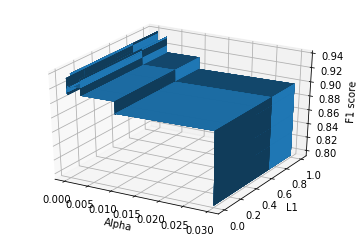

In [260]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(alpha_, l1_)

ax.plot_surface(X, Y, fscore)
ax.set_xlabel('Alpha')
ax.set_ylabel('L1')
ax.set_zlabel('F1 score')
plt.show()

With the best alpha and l1 values we retrain the model using the test dataset to make predictions.

In [261]:
# test performance
start_time = time.time()
print("Running ...")
print 
print "\tAlpha\t\tL1 Ratio\tF1-score\tAccuracy"

enet = SGDClassifier(loss='log', penalty='elasticnet', alpha=best_alpha, l1_ratio=best_l1) 
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
en_test_acc = accuracy_score(y_test, y_pred)
en_test_f1score = f1_score(y_test, y_pred, average='weighted')
print "\t{:f}\t{:f}\t{:f}\t{:f}".format(best_alpha, best_l1, en_test_f1score, en_test_acc)
print 
print "Confusion matrix"
print confusion_matrix(y_test, y_pred)

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("EN")
parameters_r.append("Alpha={}, L1={}".format(best_alpha, best_l1))
f1score_r.append(en_test_f1score)
accuracy_r.append(en_test_acc)

Running ...

	Alpha		L1 Ratio	F1-score	Accuracy
	0.001000	0.500000	0.943121	0.943672

Confusion matrix
[[490   3   3   0   0   0]
 [ 16 440  14   1   0   0]
 [  4  10 404   0   2   0]
 [  1   3   0 389  98   0]
 [  2   0   0   9 521   0]
 [  0   0   0   0   0 537]]
--- Running time: 1.21427702904 seconds ---


### Support Vector Machine with RBF

In [263]:

g = [1e-3, 1e-4]
C = [1, 10, 100, 1000]

gamma_ = []
c_val = []
fscore = []
accur = []
print("Running ...")
print 

print "\tGamma\t\tC value\t\tF1-score\tAccuracy"

for i in range(0,2):
    for j in C:
        svc = svm.SVC(C=j, kernel='rbf', gamma=g[i]) 
        y_pred = cross_val_predict(svc, X_train, y_train, cv=10)
        svm_fscore = f1_score(y_train, y_pred, average='weighted')
        svm_accuracy = accuracy_score(y_train, y_pred)
        gamma_.append(g[i])
        c_val.append(j)
        fscore.append(svm_fscore)
        accur.append(svm_accuracy)
        print "\t{:f}\t{:f}\t{:f}\t{:f}".format(g[i],j,svm_fscore, svm_accuracy)

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))


Running ...

	Gamma		C value		F1-score	Accuracy
	0.001000	1.000000	0.908012	0.908324
	0.001000	10.000000	0.943264	0.943281
	0.001000	100.000000	0.951152	0.951170
	0.001000	1000.000000	0.952643	0.952666
	0.000100	1.000000	0.793790	0.814064
	0.000100	10.000000	0.908279	0.908596
	0.000100	100.000000	0.942461	0.942465
	0.000100	1000.000000	0.948194	0.948177
--- Running time: 1005.99349284 seconds ---


In [264]:
print "The highest f1 score is {}". format(max(fscore))
idx = fscore.index(max(fscore))
best_gamma = gamma_[idx]
best_C = c_val[idx]
print "The best parameters are gamma={}, C={}".format(best_gamma, best_C)

The highest f1 score is 0.95264291425
The best parameters are gamma=0.001, C=1000


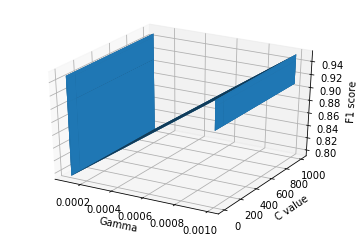

In [265]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(gamma_, c_val)

ax.plot_surface(X, Y, fscore)
ax.set_xlabel('Gamma')
ax.set_ylabel('C value')
ax.set_zlabel('F1 score')
plt.show()

In [266]:
start_time = time.time()
print("Running ...")
print 
print "\tGamma\t\tC value\t\tF1-score\tAccuracy"

svc = svm.SVC(kernel='rbf', gamma=best_gamma, C=best_C)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
svm_test_acc = accuracy_score(y_test, y_pred)
svm_test_f1score = f1_score(y_test, y_pred, average='weighted')
print "\t{:f}\t{:f}\t{:f}\t{:f}".format(best_gamma, best_C, svm_test_f1score, svm_test_acc)
print 
print "Confusion matrix"
print confusion_matrix(y_test, y_pred)

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("SVM")
parameters_r.append("Gamma={} C={}".format(best_gamma, best_C))
f1score_r.append(svm_test_f1score)
accuracy_r.append(svm_test_acc)

Running ...

	Gamma		C value		F1-score	Accuracy
	0.001000	1000.000000	0.965625	0.965728

Confusion matrix
[[493   0   3   0   0   0]
 [ 17 454   0   0   0   0]
 [  4  10 406   0   0   0]
 [  0   2   0 436  53   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]
--- Running time: 3.69142103195 seconds ---


### Random Forest

In [269]:
depth = [300,500,600]
trees = [200,500,700]

depth_ = []
trees_ = []
fscore = []
accur = []

print("Running ...")
print 

print "\tDepth\t\tNo. of Trees\tF1-score\tAccuracy"

for i in range(0,2):
    for j in trees:
        rfclf = RandomForestClassifier(n_estimators=j, max_depth=depth[i], random_state=444)
        y_pred = cross_val_predict(rfclf, X_train, y_train, cv=10)
        rf_f1score = f1_score(y_train, y_pred, average='weighted')
        rf_accuracy = accuracy_score(y_train, y_pred)
        depth_.append(depth[i])
        trees_.append(j)
        fscore.append(rf_f1score)
        accur.append(rf_accuracy)
        print "\t{:f}\t{:f}\t{:f}\t{:f}".format(depth[i],j,rf_f1score, rf_accuracy)
        
print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...

	Depth		No. of Trees	F1-score	Accuracy
	300.000000	200.000000	0.929999	0.929951
	300.000000	500.000000	0.931649	0.931583
	300.000000	700.000000	0.932192	0.932127
	500.000000	200.000000	0.929999	0.929951
	500.000000	500.000000	0.931649	0.931583
	500.000000	700.000000	0.932192	0.932127
--- Running time: 3082.18720508 seconds ---


In [270]:
print "The highest f1 score is {}". format(max(fscore))
idx = fscore.index(max(fscore))
best_depth = depth_[idx]
best_trees = trees_[idx]
print "The best parameters are tree depth={} with no. of trees={}".format(best_depth, best_trees)

The highest f1 score is 0.932192120239
The best parameters are tree depth=300 with no. of trees=700


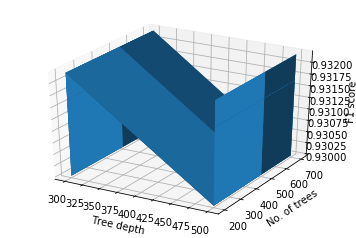

In [271]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(depth_, trees_)

ax.plot_surface(X, Y, fscore)
ax.set_xlabel('Tree depth')
ax.set_ylabel('No. of trees')
ax.set_zlabel('F1 score')
plt.show()

In [274]:
start_time = time.time()
print("Running ...")
print 
print "\tDepth\t\tNo. of Trees\tF1-score\tAccuracy"

rfclf = RandomForestClassifier(n_estimators=best_trees, max_depth=best_depth, random_state=444)
rfclf.fit(X_train,y_train)
y_pred = rfclf.predict(X_test)
rf_test_acc = accuracy_score(y_test, y_pred)
rf_test_f1score = f1_score(y_test, y_pred, average='weighted')
print "\t{:f}\t{:f}\t{:f}\t{:f}".format(best_depth, best_trees, rf_test_f1score, rf_test_acc)
print 
print "Confusion matrix"
print confusion_matrix(y_test, y_pred)

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("RF")
parameters_r.append("Depth={} Trees={}".format(best_depth, best_trees))
f1score_r.append(rf_test_f1score)
accuracy_r.append(rf_test_acc)

Running ...

	Depth		No. of Trees	F1-score	Accuracy
	300.000000	700.000000	0.926447	0.926705

Confusion matrix
[[481   7   8   0   0   0]
 [ 33 431   7   0   0   0]
 [ 20  46 354   0   0   0]
 [  0   0   0 440  51   0]
 [  0   0   0  44 488   0]
 [  0   0   0   0   0 537]]
--- Running time: 85.326390028 seconds ---


### Discussion

In [372]:
print "Summary:"
print "\tClassifier\tBest parameters\t\t\tF1 Score\tAccuracy"
for i in range(0,4):
    print "\t{:s}\t\t{:s}\t\t{:f}\t{:f}".format(classifier_r[i], parameters_r[i], f1score_r[i], accuracy_r[i])
print 
idx = f1score_r.index(max(f1score_r))
idx_ = f1score_r.index(min(f1score_r))
print 'The highest F1 Score is {} where {} classifier is used with {}.'.format(max(f1score_r), classifier_r[idx], parameters_r[idx])
print 'The performance result is the same (that is 96%) with  result in the dataset paper. The use of RBF kernel makes SVM classifier learns non-linear problems better. SVM performance can be improved with large training data set.'
print 
print 'The worst performing classifier is {} with {} which gave F1 score {}.'. format(classifier_r[idx_],  parameters_r[idx_], min(f1score_r))
print 'k-NN classisifier can be improved by assigning weights to the neighbours. Neighbours with large distances could be assigned with low weights.'



Summary:
	Classifier	Best parameters			F1 Score	Accuracy
	K-NN		No. of neighbours = 10		0.905978	0.906685
	EN		Alpha=0.001 L1=0.5		0.943121	0.943672
	SVM		Gamma=0.001 C=1000		0.965625	0.965728
	RF		Depth=300 Trees=700		0.926447	0.926705

The highest F1 Score is 0.965624534728 where SVM classifier is used with Gamma=0.001 C=1000.
The performance result is the same (that is 96%) with  result in the dataset paper. The use of RBF kernel makes SVM classifier learns non-linear problems better. SVM performance can be improved with large training data set.

The worst performing classifier is K-NN with No. of neighbours = 10 which gave F1 score 0.90597818803.
k-NN classisifier can be improved by assigning weights to the neighbours. Neighbours with large distances could be assigned with low weights.
